 🧹 PARTE A - Preparação e Limpeza de Dados



In [2]:
# 📦 Importar bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configurações gerais
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [16]:
# 📂 Carregar o dataset
df_raw = pd.read_csv("datasets/hotel.csv", sep=",")   # ajusta o separador se necessário
print("Dimensões do dataset:", df.shape)
# Cria uma cópia para trabalhar — preservando o original intacto
df = df_raw.copy()

Dimensões do dataset: (5506, 36)


In [17]:
print("✅ Cópia criada. Todas as transformações serão aplicadas em 'df', não em 'df_raw'.")
df.head()

✅ Cópia criada. Todas as transformações serão aplicadas em 'df', não em 'df_raw'.


,reserva_id,cliente_id,data_checkin,data_checkout,noites,antecedencia_dias,num_hospedes,tipo_quarto,motivo_viagem,canal_reserva,regime,mes,epoca,fim_semana,feriado,evento_cidade,foi_spa,num_massagens,pediu_room_service,num_vezes_room_service,late_checkout,estacionamento,transfer_aeroporto,consumo_minibar,consumo_bar_hotel,gasto_spa,rating_limpeza,rating_staff,rating_localizacao,rating_geral,fez_reclamacao,preco_quarto_noite,gasto_quarto_total,gasto_extras_total,gasto_total,desconto_aplicado
0,H004323,C002561,2023-07-14,2023-07-16,2,133,2,Standard,Evento,Booking,Pequeno_Almoco,7,Alta,Não,Não,Não,Não,0,Não,0,Sim,Não,Não,0.00,18.63,0.00,4.0,4.0,5,4,Não,103.90,207.80,18.63,226.43,0.00
1,H001200,C002942,2024-10-25,2024-10-31,6,40,3,Suite,Lazer,Direto,Pequeno_Almoco,10,Media,Não,Não,Não,Não,0,Não,0,Sim,Sim,Não,0.00,0.00,0.00,5.0,4.0,5,4,Não,209.20,1255.20,48.00,1303.20,71.14
2,H004501,C002274,2024-10-21,2024-10-24,3,3,4,Familiar,Business,Booking,Pequeno_Almoco,10,Media,Não,Não,Não,Não,0,Não,0,Não,Sim,Sim,37.54,0.00,0.00,5.0,4.0,4,4,Não,170.15,510.45,111.54,621.99,0.00
3,H005429,C007773,2024-07-19,2024-07-24,5,60,2,Superior,Lazer,Booking,Pequeno_Almoco,7,Alta,Não,Não,Não,Sim,3,Não,0,Não,Sim,Não,0.00,47.62,120.77,4.0,5.0,4,5,Não,168.96,844.80,208.39,1053.19,0.00
4,H003793,C001820,2023-11-12,2023-11-16,4,12,1,Standard,Lazer,Booking,Meia_Pensao,11,Baixa,Sim,Não,Não,Sim,1,Não,0,Não,Não,Sim,0.00,0.00,73.22,4.0,5.0,5,5,Não,91.91,367.64,223.22,590.86,0.00


In [6]:
# 2️⃣ Verificação inicial de dados
print("\n🔍 Informações gerais:")
df.info()


🔍 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reserva_id              5506 non-null   object 
 1   cliente_id              5506 non-null   object 
 2   data_checkin            5506 non-null   object 
 3   data_checkout           5506 non-null   object 
 4   noites                  5506 non-null   int64  
 5   antecedencia_dias       5506 non-null   int64  
 6   num_hospedes            5506 non-null   int64  
 7   tipo_quarto             5506 non-null   object 
 8   motivo_viagem           5506 non-null   object 
 9   canal_reserva           5506 non-null   object 
 10  regime                  5506 non-null   object 
 11  mes                     5506 non-null   int64  
 12  epoca                   5506 non-null   object 
 13  fim_semana              5506 non-null   object 
 14  feriado          

In [15]:
print("\n📊 Estatísticas:")
display(df.describe(include="all"))

print("\n🚨 Valores nulos por coluna:")
print(df.isnull().sum().sort_values(ascending=False))

print(f"\n📎 Duplicados: {df.duplicated().sum()}")


📊 Estatísticas:


,reserva_id,cliente_id,data_checkin,data_checkout,noites,antecedencia_dias,num_hospedes,tipo_quarto,motivo_viagem,canal_reserva,regime,mes,epoca,fim_semana,feriado,evento_cidade,foi_spa,num_massagens,pediu_room_service,num_vezes_room_service,late_checkout,estacionamento,transfer_aeroporto,consumo_minibar,consumo_bar_hotel,gasto_spa,rating_limpeza,rating_staff,rating_localizacao,rating_geral,fez_reclamacao,preco_quarto_noite,gasto_quarto_total,gasto_extras_total,gasto_total,desconto_aplicado
count,5506,5506,5506,5506,5506.000000,5506.000000,5506.000000,5506,5506,5506,5506,5506.000000,5506,5506,5506,5506,5506,5506.000000,5506,5506.000000,5506,5506,5506,5396.000000,5506.000000,5506.000000,5286.000000,5286.000000,5506.000000,5506.000000,5506,5506.000000,5506.000000,5506.000000,5506.000000,5506.000000
unique,5500,3126,NaN,NaN,NaN,NaN,NaN,4,3,4,2,NaN,3,2,2,2,2,NaN,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,H004555,C002561,NaN,NaN,NaN,NaN,NaN,Standard,Lazer,Booking,Pequeno_Almoco,NaN,Baixa,False,False,False,False,NaN,False,NaN,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,2,4,NaN,NaN,NaN,NaN,NaN,2153,3506,2227,4396,NaN,2294,3880,5470,4941,2813,NaN,3462,NaN,4093,3135,3523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5132,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2024-01-05 05:49:55.859062784,2024-01-08 16:53:57.776970496,3.509081,33.241736,2.408827,NaN,NaN,NaN,NaN,6.592445,NaN,NaN,NaN,NaN,NaN,0.715583,NaN,0.772612,NaN,NaN,NaN,9.814090,11.925454,44.872443,4.373061,4.500946,4.283872,4.189430,NaN,151.205378,531.258503,169.041093,700.299597,14.326062
min,NaN,NaN,2023-01-01 00:00:00,2023-01-02 00:00:00,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,NaN,72.040000,72.090000,0.000000,84.210000,0.000000
25%,NaN,NaN,2023-07-04 00:00:00,2023-07-08 00:00:00,2.000000,12.000000,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,NaN,103.915000,246.525000,72.035000,358.505000,0.000000
50%,NaN,NaN,2024-01-04 00:00:00,2024-01-08 00:00:00,3.000000,25.000000,2.000000,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.000000,5.000000,4.000000,4.000000,NaN,136.765000,421.310000,130.985000,564.335000,0.000000
75%,NaN,NaN,2024-07-09 00:00:00,2024-07-12 00:00:00,5.000000,45.000000,3.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,19.990000,22.102500,85.150000,5.000000,5.000000,5.000000,5.000000,NaN,185.857500,682.187500,215.137500,901.637500,0.000000
max,NaN,NaN,2024-12-31 00:00:00,2025-01-07 00:00:00,27.000000,180.000000,4.000000,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,5.000000,NaN,NaN,NaN,40.000000,74.970000,262.840000,5.000000,5.000000,5.000000,5.000000,NaN,405.670000,5279.940000,1302.260000,5521.860000,368.330000



🚨 Valores nulos por coluna:
rating_staff              220
rating_limpeza            220
consumo_minibar           110
cliente_id                  0
late_checkout               0
estacionamento              0
transfer_aeroporto          0
consumo_bar_hotel           0
gasto_spa                   0
reserva_id                  0
rating_localizacao          0
rating_geral                0
fez_reclamacao              0
preco_quarto_noite          0
gasto_quarto_total          0
gasto_extras_total          0
gasto_total                 0
num_vezes_room_service      0
pediu_room_service          0
num_massagens               0
motivo_viagem               0
data_checkin                0
data_checkout               0
noites                      0
antecedencia_dias           0
num_hospedes                0
tipo_quarto                 0
canal_reserva               0
foi_spa                     0
regime                      0
mes                         0
epoca                       0
fim_semana 

In [ ]:
# 3️⃣ Tipos e conversões básicas

# Converter datas
for col in ["data_checkin", "data_checkout"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Corrigir nomes booleanos (Sim/Não → True/False)
bool_cols = [
    "foi_spa", "pediu_room_service", "late_checkout", "estacionamento",
    "transfer_aeroporto", "fim_semana", "feriado", "evento_cidade", "fez_reclamacao"
]
for col in bool_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.lower()
            .replace({"sim": True, "não": False, "nao": False, "nan": np.nan})
        )


🚨 Valores nulos por coluna:
rating_staff              220
rating_limpeza            220
consumo_minibar           110
cliente_id                  0
late_checkout               0
estacionamento              0
transfer_aeroporto          0
consumo_bar_hotel           0
gasto_spa                   0
reserva_id                  0
rating_localizacao          0
rating_geral                0
fez_reclamacao              0
preco_quarto_noite          0
gasto_quarto_total          0
gasto_extras_total          0
gasto_total                 0
num_vezes_room_service      0
pediu_room_service          0
num_massagens               0
motivo_viagem               0
data_checkin                0
data_checkout               0
noites                      0
antecedencia_dias           0
num_hospedes                0
tipo_quarto                 0
canal_reserva               0
foi_spa                     0
regime                      0
mes                         0
epoca                       0
fim_semana 

In [20]:
# 4️⃣ Identificar e corrigir problemas nos dados

# ❌ Datas inválidas (checkout < checkin)
invalid_dates = df[df["data_checkout"] < df["data_checkin"]]
print(f"\nDatas inválidas: {len(invalid_dates)}")



Datas inválidas: 5


In [21]:
# Corrigir automaticamente (exemplo: trocar se invertidas)
df.loc[df["data_checkout"] < df["data_checkin"], ["data_checkin", "data_checkout"]] = \
    df.loc[df["data_checkout"] < df["data_checkin"], ["data_checkout", "data_checkin"]].values


In [22]:
# ❌ Valores ausentes
print("\nColunas com missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Colunas com missing values:
consumo_minibar    110
rating_limpeza     220
rating_staff       220
dtype: int64


In [25]:
# Estratégias básicas de imputação
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Preencher numéricos com mediana
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Preencher categóricos com moda
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ❌ Duplicados
df = df.drop_duplicates()

In [26]:
# 5️⃣ Detecção e tratamento de outliers

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ["noites", "gasto_total", "gasto_quarto_total", "gasto_extras_total"]:
    if col in df.columns:
        before = len(df)
        df = remove_outliers_iqr(df, col)
        after = len(df)
        print(f"Removidos {before - after} outliers na coluna {col}")


Removidos 98 outliers na coluna noites
Removidos 227 outliers na coluna gasto_total
Removidos 99 outliers na coluna gasto_quarto_total
Removidos 251 outliers na coluna gasto_extras_total


In [27]:
# 6️⃣ Verificação pós-limpeza

print("\n✅ Dimensões após limpeza:", df.shape)
print("Valores nulos restantes:", df.isnull().sum().sum())


✅ Dimensões após limpeza: (4825, 36)
Valores nulos restantes: 0


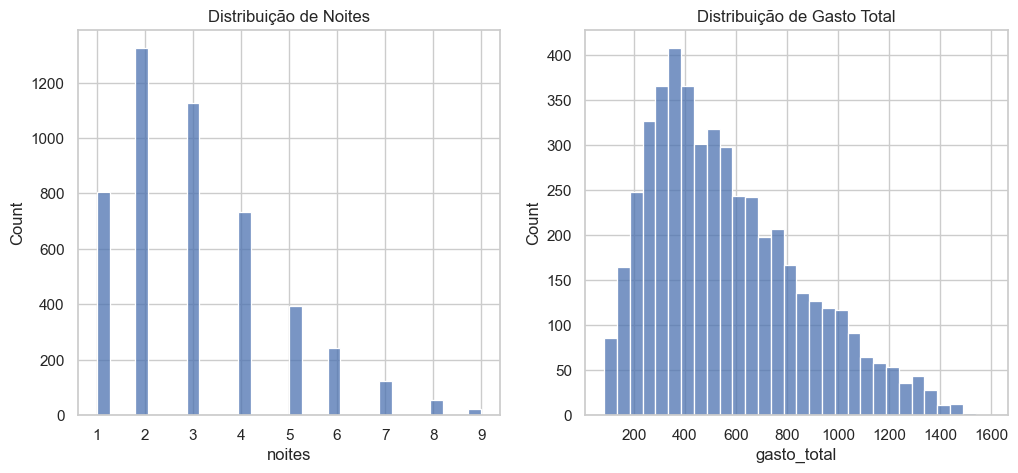

In [28]:
# 7️⃣ Visualizações rápidas

# Distribuição de noites e gasto_total
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["noites"], bins=30, ax=axes[0])
axes[0].set_title("Distribuição de Noites")
sns.histplot(df["gasto_total"], bins=30, ax=axes[1])
axes[1].set_title("Distribuição de Gasto Total")
plt.show()

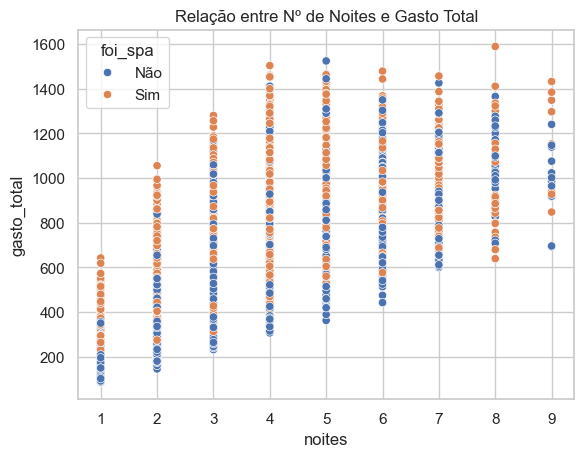

In [29]:
# Relação entre noites e gasto_total
sns.scatterplot(data=df, x="noites", y="gasto_total", hue="foi_spa")
plt.title("Relação entre Nº de Noites e Gasto Total")
plt.show()

In [30]:
# 7️⃣ Exportar dataset limpo

df.to_csv("hotel_limpo.csv", index=False)
print("\n💾 Dataset limpo salvo como 'hotel_limpo.csv'")
print("Dimensões após limpeza:", df.shape)


💾 Dataset limpo salvo como 'hotel_limpo.csv'
Dimensões após limpeza: (4825, 36)


In [39]:
df = pd.read_csv("datasets/hotel_limpo.csv")

print("📂 Dataset limpo para Análise Exploratória:", df.shape)

📂 Dataset limpo para Análise Exploratória: (4825, 36)


In [40]:
# 📊 8️⃣ Análise Exploratória Individual
# Estatísticas descritivas
print("\n📈 Estatísticas principais:")
display(df[[
    "noites", "antecedencia_dias", "preco_quarto_noite",
    "gasto_total", "gasto_quarto_total", "gasto_extras_total"
]].describe().T)


📈 Estatísticas principais:


,count,mean,std,min,25%,50%,75%,max
noites,4825.0,3.042073,1.649693,1.00,2.00,3.00,4.00,9.00
antecedencia_dias,4825.0,32.915026,28.551585,0.00,12.00,24.00,45.00,180.00
preco_quarto_noite,4825.0,145.957581,56.616633,72.04,100.83,131.18,178.44,405.67
gasto_total,4825.0,566.040350,294.346300,84.21,337.25,508.63,752.31,1589.99
gasto_quarto_total,4825.0,430.890091,257.580980,72.09,229.46,373.38,583.41,1201.50
gasto_extras_total,4825.0,135.150259,90.094609,0.00,66.00,119.16,188.37,406.76


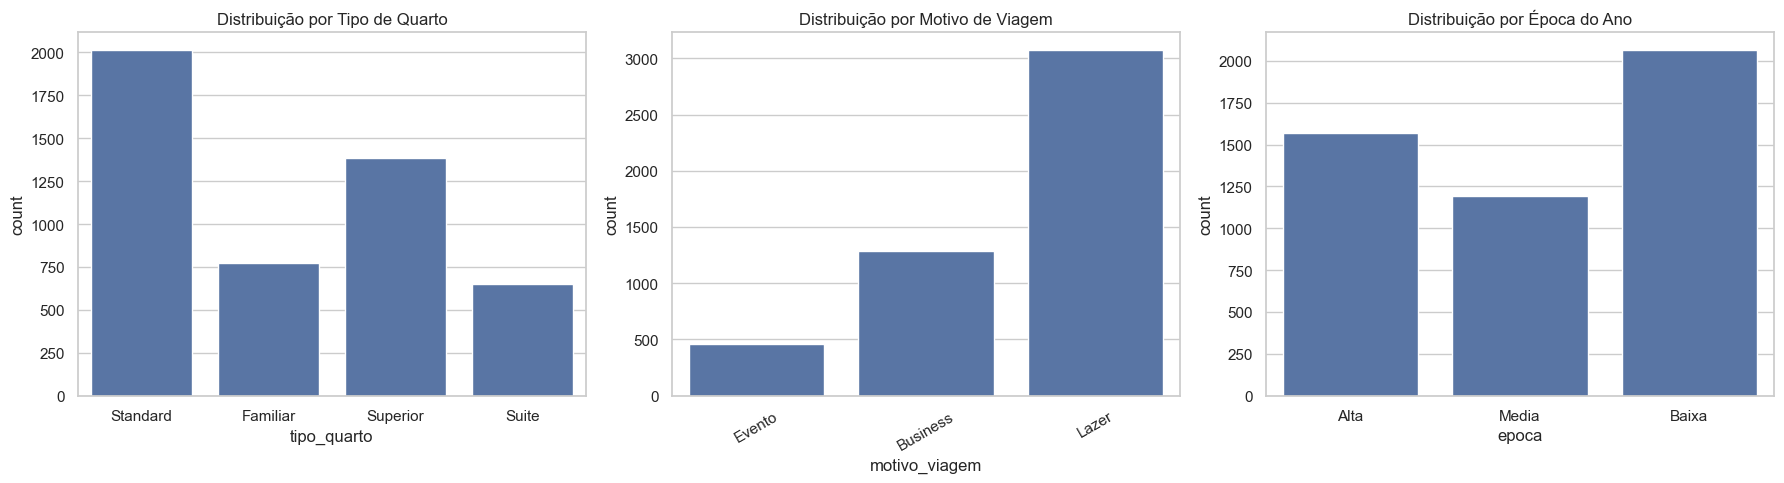

In [41]:
# Distribuição de variáveis categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x="tipo_quarto", data=df, ax=axes[0])
axes[0].set_title("Distribuição por Tipo de Quarto")
sns.countplot(x="motivo_viagem", data=df, ax=axes[1])
axes[1].set_title("Distribuição por Motivo de Viagem")
axes[1].tick_params(axis='x', rotation=30)
sns.countplot(x="epoca", data=df, ax=axes[2])
axes[2].set_title("Distribuição por Época do Ano")
plt.tight_layout()
plt.show()

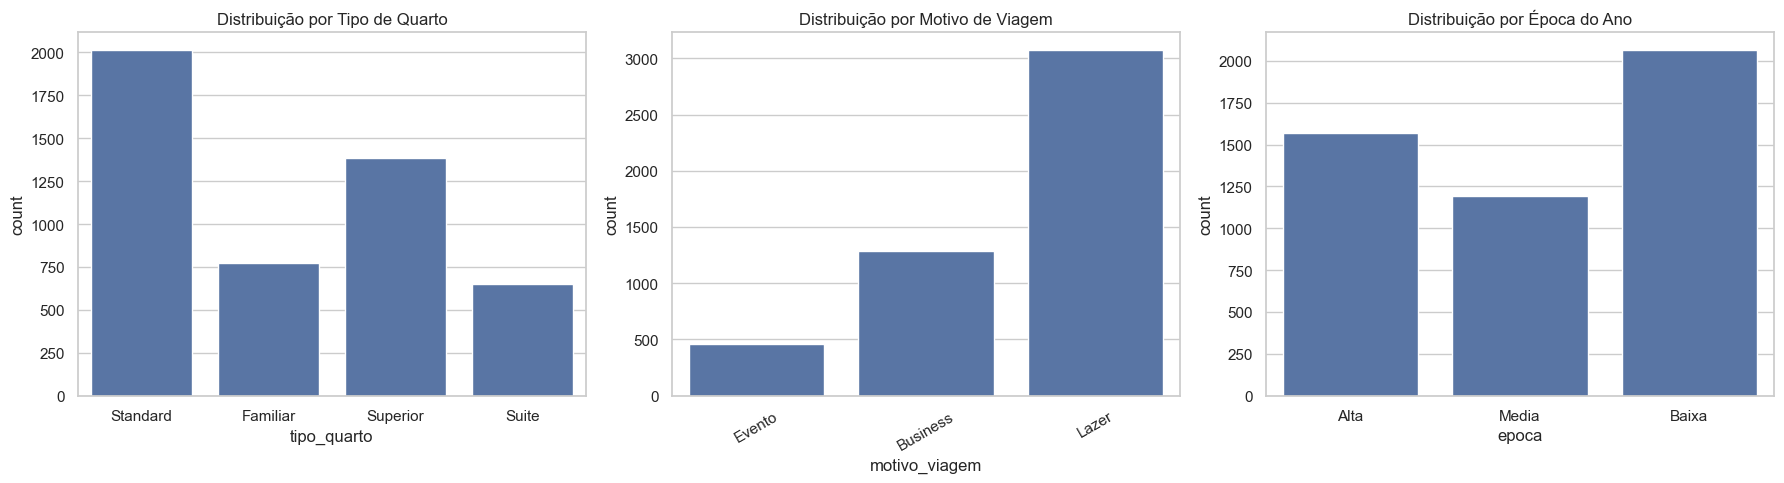

In [47]:
# Distribuição de tipo_quarto, motivo_viagem, época
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x="tipo_quarto", data=df, ax=axes[0])
axes[0].set_title("Distribuição por Tipo de Quarto")

sns.countplot(x="motivo_viagem", data=df, ax=axes[1])
axes[1].set_title("Distribuição por Motivo de Viagem")
axes[1].tick_params(axis='x', rotation=30)

sns.countplot(x="epoca", data=df, ax=axes[2])
axes[2].set_title("Distribuição por Época do Ano")

plt.tight_layout()
plt.show()


/Users/luana/Desktop/Projeto Final/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


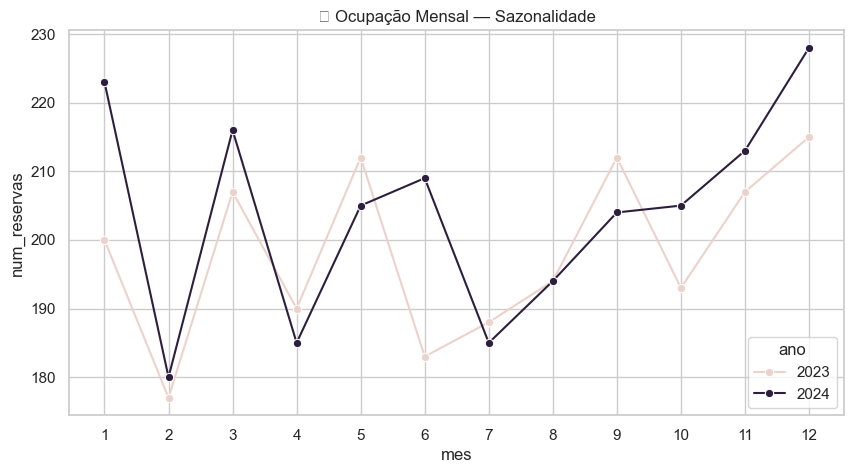

In [48]:
# Análise temporal (ocupação por mês, sazonalidade)
df["mes"] = df["data_checkin"].dt.month
df["ano"] = df["data_checkin"].dt.year

ocup = df.groupby(["ano", "mes"]).size().reset_index(name="num_reservas")

plt.figure(figsize=(10, 5))
sns.lineplot(data=ocup, x="mes", y="num_reservas", hue="ano", marker="o")
plt.title("📅 Ocupação Mensal — Sazonalidade")
plt.xticks(range(1, 13))
plt.show()


/Users/luana/Desktop/Projeto Final/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


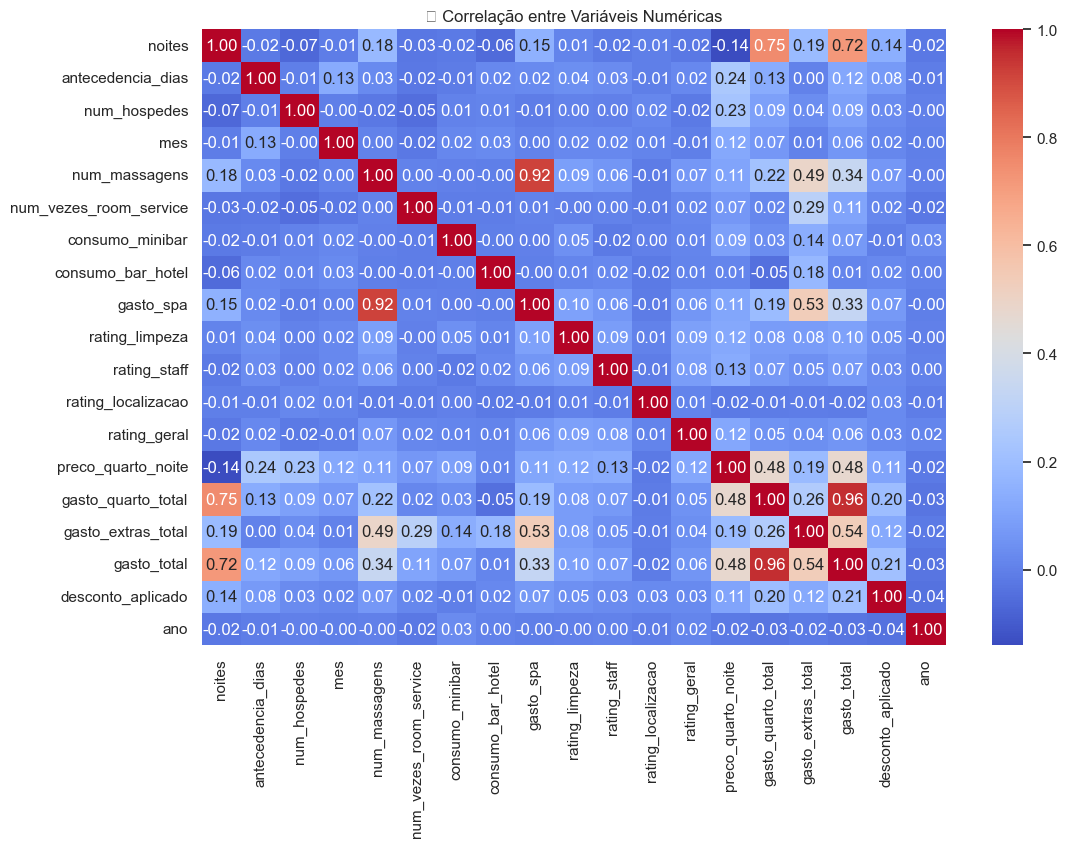

In [49]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlação entre Variáveis Numéricas")
plt.show()


/var/folders/zn/76llcf_53y1gktzpnrpfpcdr0000gn/T/ipykernel_11802/3737736949.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"sim": 1, "não": 0, "nao": 0, "true": 1, "false": 0})


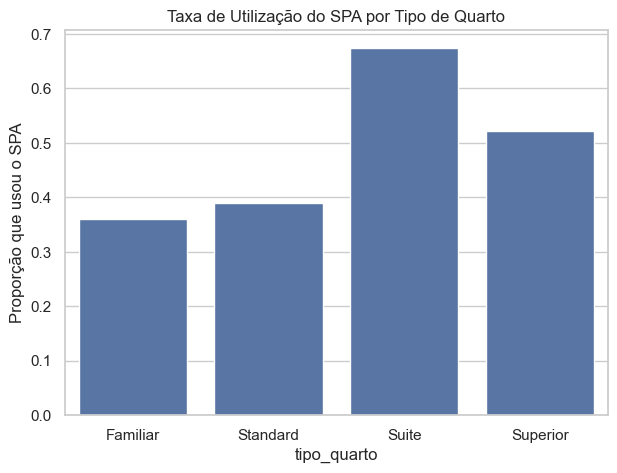

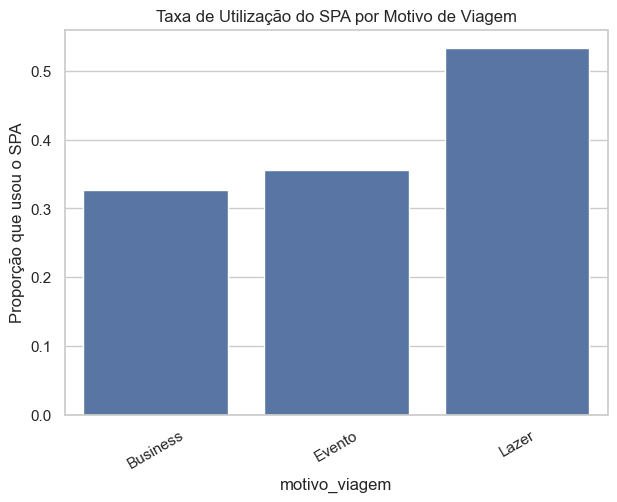

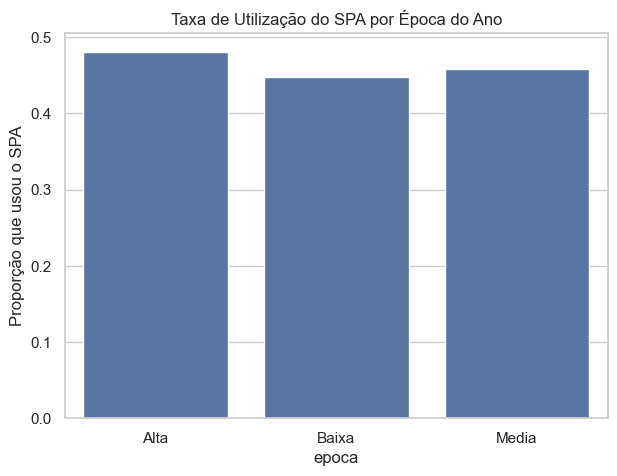

In [ ]:
# Taxa de utilização do SPA por segmento
df["foi_spa"] = (
    df["foi_spa"]
    .astype(str)
    .str.lower()
    .replace({"sim": 1, "não": 0, "nao": 0, "true": 1, "false": 0})
).astype(float)

# Por tipo de quarto
spa_quarto = df.groupby("tipo_quarto")["foi_spa"].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x="tipo_quarto", y="foi_spa", data=spa_quarto)
plt.title("Taxa de Utilização do SPA por Tipo de Quarto")
plt.ylabel("Proporção que usou o SPA")
plt.show()

# Por motivo de viagem
spa_motivo = df.groupby("motivo_viagem")["foi_spa"].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x="motivo_viagem", y="foi_spa", data=spa_motivo)
plt.title("Taxa de Utilização do SPA por Motivo de Viagem")
plt.ylabel("Proporção que usou o SPA")
plt.xticks(rotation=30)
plt.show()

# Por época
spa_epoca = df.groupby("epoca")["foi_spa"].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x="epoca", y="foi_spa", data=spa_epoca)
plt.title("Taxa de Utilização do SPA por Época do Ano")
plt.ylabel("Proporção que usou o SPA")
plt.show()
